# Linear Regression and Modeling Using R

#### Arash Sadeghzadeh

For more details see: https://github.com/BredaUniversityADSAI/ADS-AI/blob/c36fbbdfd0ffdd4e568a340b178e53606327d1b2/docs/Study%20Content/Statistical%20Inference/assets/OpenIntro_Statistics_Third_Edition.pdf

In [13]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(GGally)

ERROR: Error in library(ggplot2): there is no package called 'ggplot2'


## Load Data

In [3]:
load("gss.Rdata")

In this notebook, we would like to build a linear model to predict the income (see **coninc** column in the data frame) using a few predictors. 

Let's choose some relevant columns from the data frame to start with:

In [4]:
gss_filt <- gss %>% filter(year==2012) %>% 
                    select(coninc, age, sex, educ, race, degree, wrkslf, marital,  wrkstat)

dim(gss_filt)
head(gss_filt)

[1] 1974    9

coninc age sex    educ race  degree      wrkslf       marital      
1 178712 22  Male   16   White Bachelor    Someone Else Never Married
2 178712 21  Male   12   White High School Someone Else Never Married
3  91920 42  Male   12   Other High School Someone Else Married      
4 107240 49  Female 13   White High School Someone Else Married      
5  42130 70  Female 16   Black Bachelor    Someone Else Separated    
6  21065 50  Female 19   White Bachelor    Someone Else Widowed      
  wrkstat         
1 Working Parttime
2 Working Parttime
3 Working Fulltime
4 Other           
5 Retired         
6 Other

Let's have a look at the number of the missing values in our data frame:

In [5]:
gss_filt %>% summarise_all(~ sum(is.na(.)))

coninc age sex educ race degree wrkslf marital wrkstat
1 216    5   0   2    0    8      80     0       1

Now, since the number of NA values is not too high, we can omit those observations from the data frame to clean our data.

In [6]:
gss_withoutNA <- na.omit(gss_filt)
gss_withoutNA %>% summarise_all(~ sum(is.na(.)))

coninc age sex educ race degree wrkslf marital wrkstat
1 0      0   0   0    0    0      0      0       0

Let's now detect and delete the outliers:

In [7]:
detect_outlier <- function(x) {
    Q1 <- quantile(x, probs=.25)
    Q3 <- quantile(x, probs=.75)
    # calculate inter quartile range
    IQR = Q3 - Q1
    # return true or false
    x > Q3 + (IQR*1.5) | x < Q1 - (IQR*1.5)
}

# Number of the outliers
sum(detect_outlier(gss_withoutNA$coninc))

gss_cl <- subset(gss_withoutNA, !detect_outlier(gss_withoutNA$coninc))

[1] 140

In [8]:
dim(gss_cl)

[1] 1551    9

## Linear Regression with One Predictor

- Define the explanatory variable as the independent variable (predictor), and the response variable as the dependent variable (predicted)

- Define the linear regression model as
$\quad \hat{y}=\beta_0 + \beta_1x$

- The point estimates (estimated from observed data) for $\beta_0$ and $\beta_1$ are $b_0$ and $b_1$, respectively.

## Correlation

Correlation, denoted as R, describes the strength of the **linear association** between two variables

- The correlation coefficient is always between -1 (perfect negative linear association) and 1 (perfect positive linear association)
- R=0 indicates no linear relationship
- Correlation coefficient is sensitive to outliers

The correlation is intended to quantify the strength of a **linear** trend. Nonlinear trends, even when strong, sometimes produce correlations that do not reflect the strength of the relationship.

Here, you can see the computation of the correlation coefficient between **coninc** and **educ**:

In [9]:
gss_cl  %>% summarize(cor(coninc, educ))

cor(coninc, educ)
1 0.3840492

Now, let's have a look at the scatter plot of **coninc** versus **educ**:

In [10]:
ggplot(gss_cl, aes(x=educ, y=coninc)) + geom_point() + 
       stat_smooth(method = "lm", se = FALSE)

ERROR: Error in ggplot(gss_cl, aes(x = educ, y = coninc)): could not find function "ggplot"


## Linear Model

Linear regression model:

The model is obtained by minimizing the sum of squared residuals ($e_i = y_i-\hat{y}_i$):

$e_1^2 + e_2^2 + \cdots + e_n^2$

The linear model is as follows: 

$\hat{y} = b_0 + b_1 x$

- $\hat{y}$: predicted response
- $b_0$: intercept
- $b_1$: slope
- $x$: explanatory (predictor) variable

### Estimating the regression parameters
#### Slope:
$b_1 = \frac{s_y}{s_x}R$
- $s_x$: SD of $x$
- $s_y$: SD of $y$
- $R=cor(x,y)$ (correlation coefficient)

#### Intercept:
The least square line always goes through $(\bar{x}, \bar{y})$, so we have $: \bar{y} = b_0 + b_1 \bar{x}$

intercept: $\qquad b_0 =\bar{y} - b_1 \bar{x}$

In [10]:
lm1 <- lm(data=gss_cl, formula = coninc ~  educ )
summary(lm1)


Call:
lm(formula = coninc ~ educ, data = gss_cl)

Residuals:
   Min     1Q Median     3Q    Max 
-53678 -19387  -4753  16856  78691 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -10591.1     2999.5  -3.531 0.000426 ***
educ          3558.2      217.4  16.371  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24860 on 1549 degrees of freedom
Multiple R-squared:  0.1475,	Adjusted R-squared:  0.1469 
F-statistic:   268 on 1 and 1549 DF,  p-value: < 2.2e-16


So the obtained model is as follows:

$\mbox{income} = -10591.1 + 3558.2 \times \mbox{education}$

## Residuals

Residuals: leftovers from the model fit

residual:    $\qquad e_i=y_i - \hat{y}_i$

Residuals are helpful in evaluating how well a linear model  fits a data set.

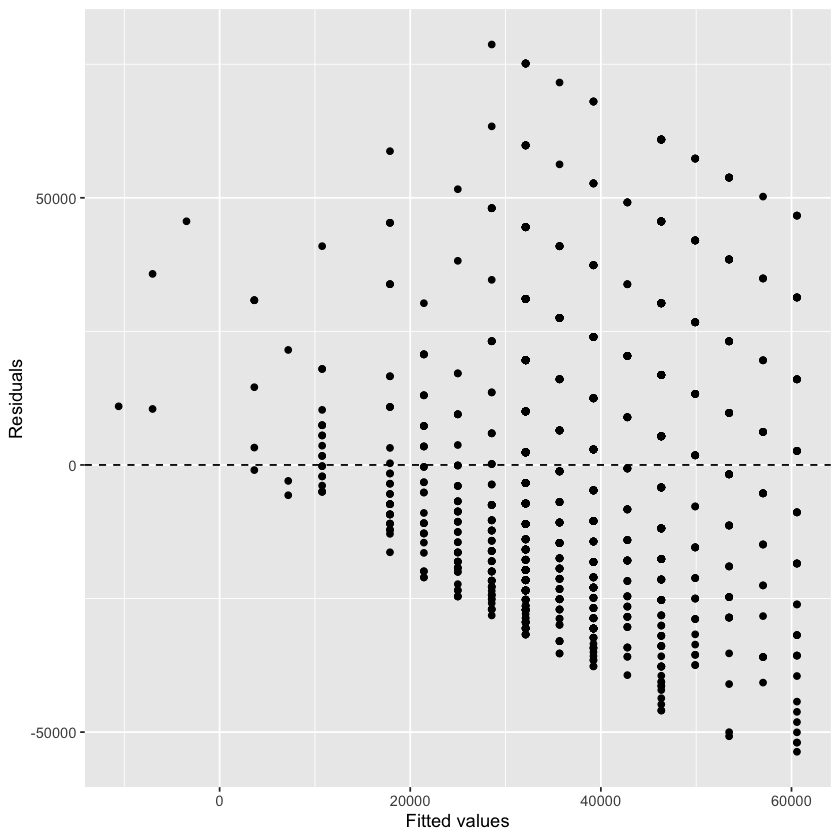

In [11]:
ggplot(data = lm1, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  xlab("Fitted values") +
  ylab("Residuals")

The data set shows a pattern in the residuals. We should not use a straight
line to model these data. Instead, a more advanced technique should be used.

## Conditions for Linear Regression

1- **Linearity**: relation between the explanatory and response variable should be linear. If there is a nonlinear trend, an advance regression method should be applied.

(check using a scatterplot of the data, or a residuals plot)

2- **Nearly normal residuals**: residuals should be nearly normally distributed, centered at 0

(check using a histogram or normal probability plot of residuals)

3- **Constant variability**: Variability of residuals around the 0 line should be roughly constant 

(check using a residuals plot)

See this:  https://gallery.shinyapps.io/slr_diag/

#### Residual plot

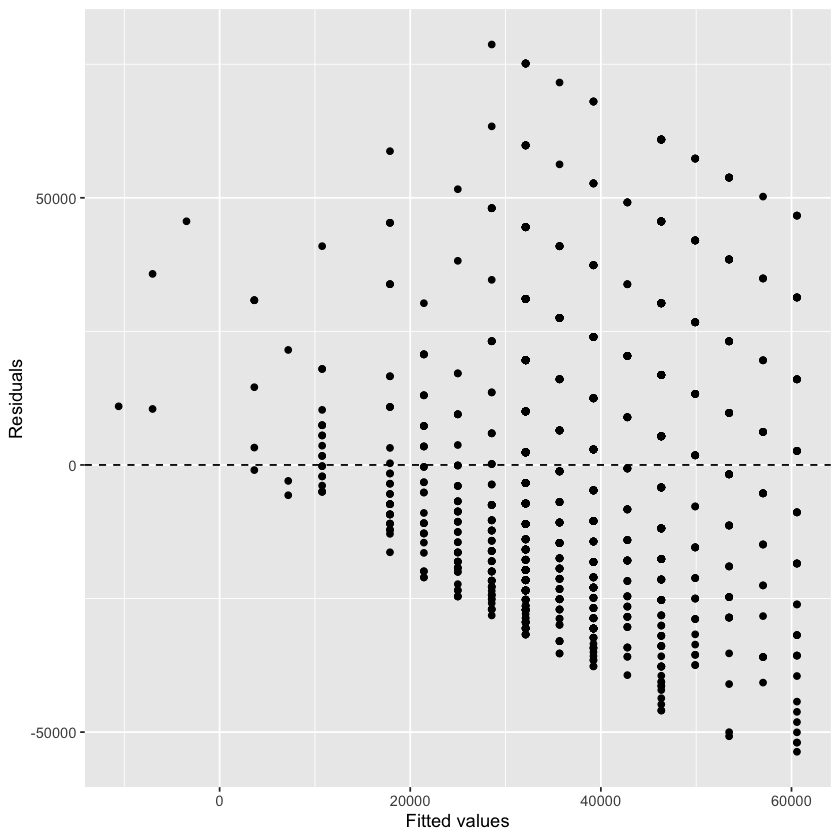

In [12]:
ggplot(data = lm1, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  xlab("Fitted values") +
  ylab("Residuals")

You can see a fan shape pattern in the residulas plot.

#### histogram of residuals

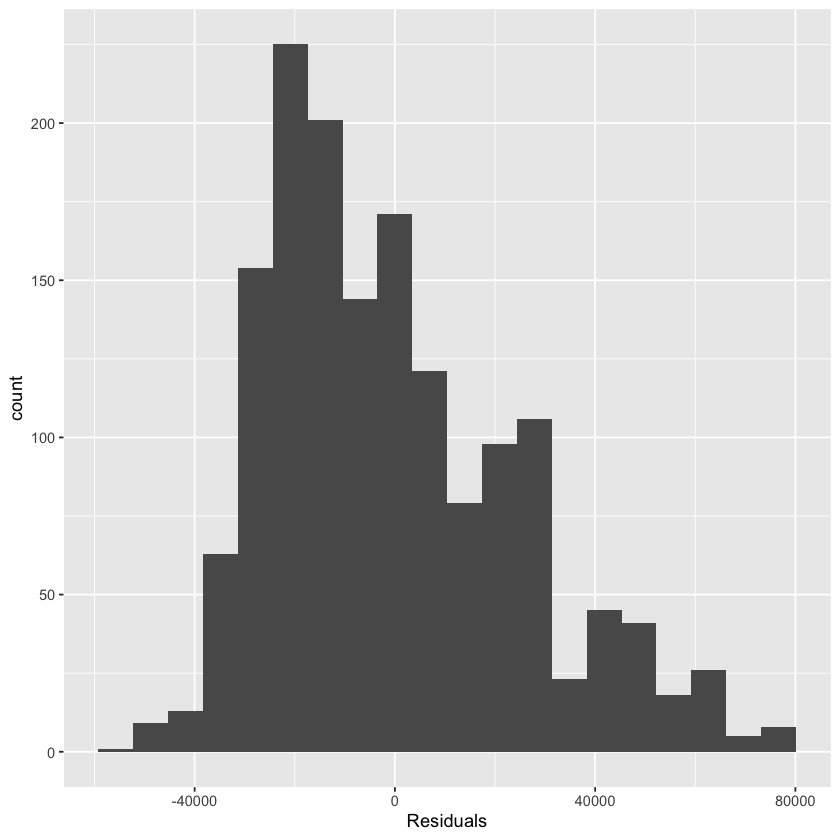

In [13]:
ggplot(data = lm1, aes(x = .resid)) +
  geom_histogram(bins=20) +
  xlab("Residuals")

####  Normal probability plot of residuals

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


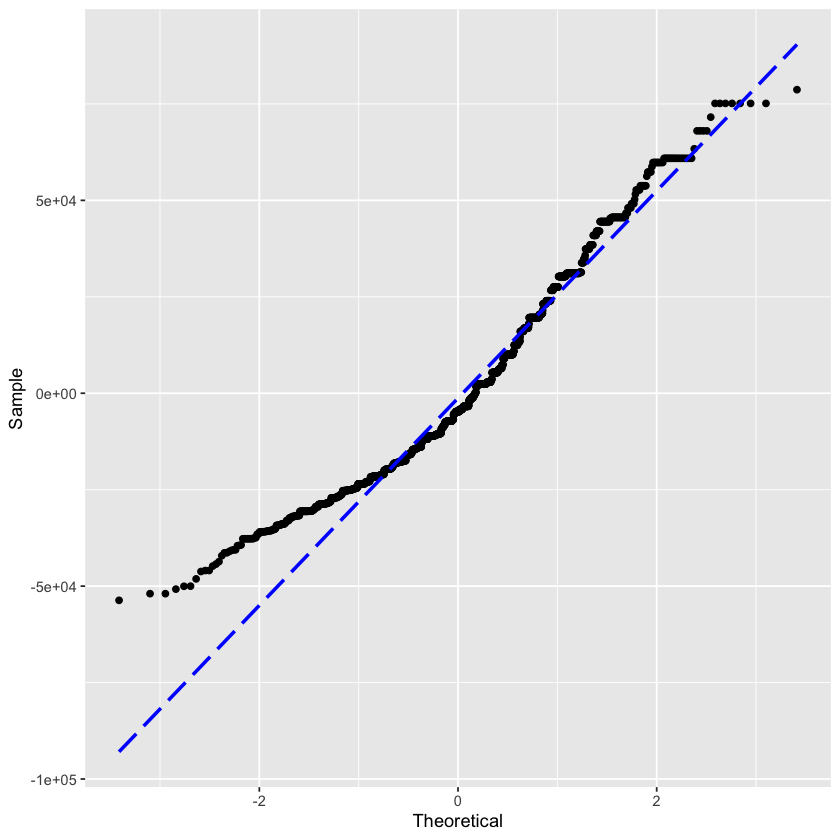

In [14]:
ggplot(data = lm1, aes(sample = .resid))  +
    stat_qq() + stat_qq_line(col='blue', lty="longdash", size=1) +
    xlab("Theoretical") + ylab("Sample")

## Box Cox Transformation

**Box-Cox** transformation is a statistical technique that transforms your target variable so that your data closely resembles a normal distribution

### Box-Cox family
The following expression gives the Box-Cox functions transformations for various values of lambda:

$
\left\{ \begin{array}{c}
\frac{x^ \lambda -1}{\lambda} \quad \mbox{if} \quad \lambda \neq0 \\
\mbox{log}(x) \quad \mbox{if} \quad \lambda=0
\end{array}
\right.
$

where $y$ is the changed variable and lambda ($\lambda$) the tramsformation parameter.

The $boxcox$ function from the MASS package in R can be used to estimate the transformation parameter using maximum likelihood estimation.

In [15]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




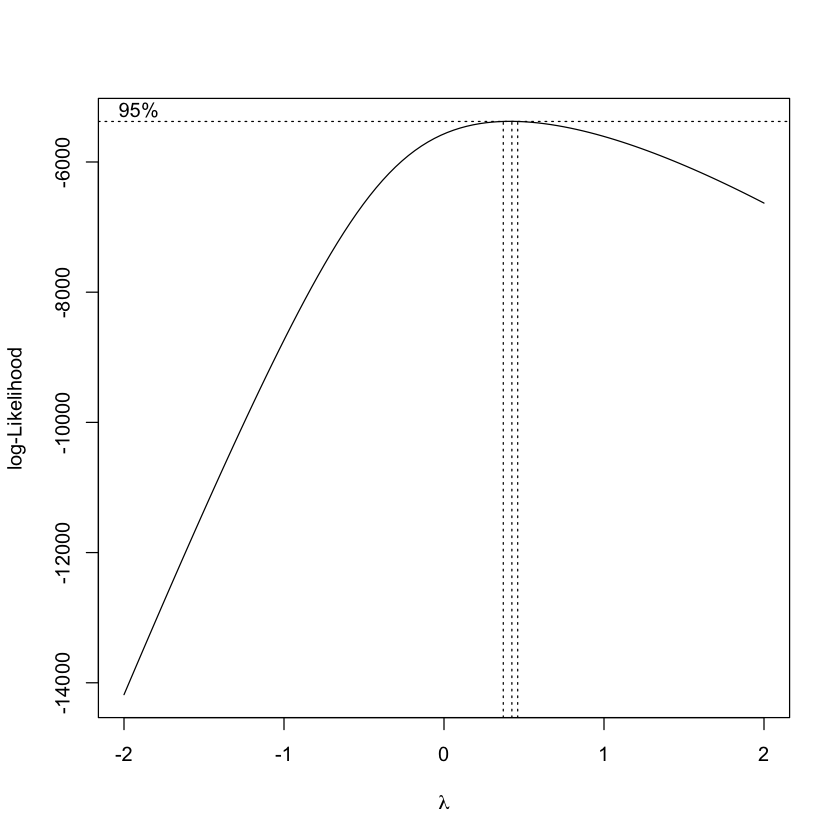

In [16]:
b <- boxcox(lm1)

In [17]:
lambda <- b$x[which.max(b$y)]
lambda

[1] 0.4242424

In [18]:
gss_cl <- gss_cl %>% mutate(coninc_trans=(coninc ^ lambda - 1) / lambda)
 head(gss_cl)


coninc age sex    educ race  degree         wrkslf       marital      
3   91920 42  Male   12   Other High School    Someone Else Married      
4  107240 49  Female 13   White High School    Someone Else Married      
5   42130 70  Female 16   Black Bachelor       Someone Else Separated    
6   21065 50  Female 19   White Bachelor       Someone Else Widowed      
7   24895 35  Female 15   White Junior College Someone Else Married      
10  24895 28  Female 17   White Bachelor       Someone Else Never Married
   wrkstat          coninc_trans
3  Working Fulltime 298.3024    
4  Other            318.6219    
5  Retired          213.5832    
6  Other            158.5681    
7  Keeping House    170.3869    
10 Working Fulltime 170.3869

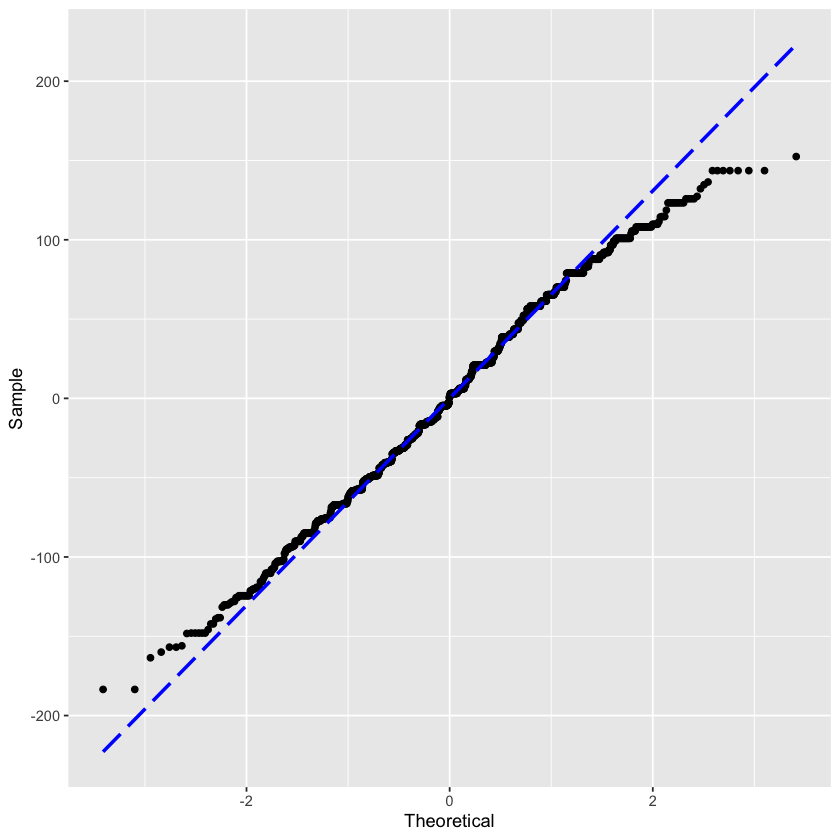

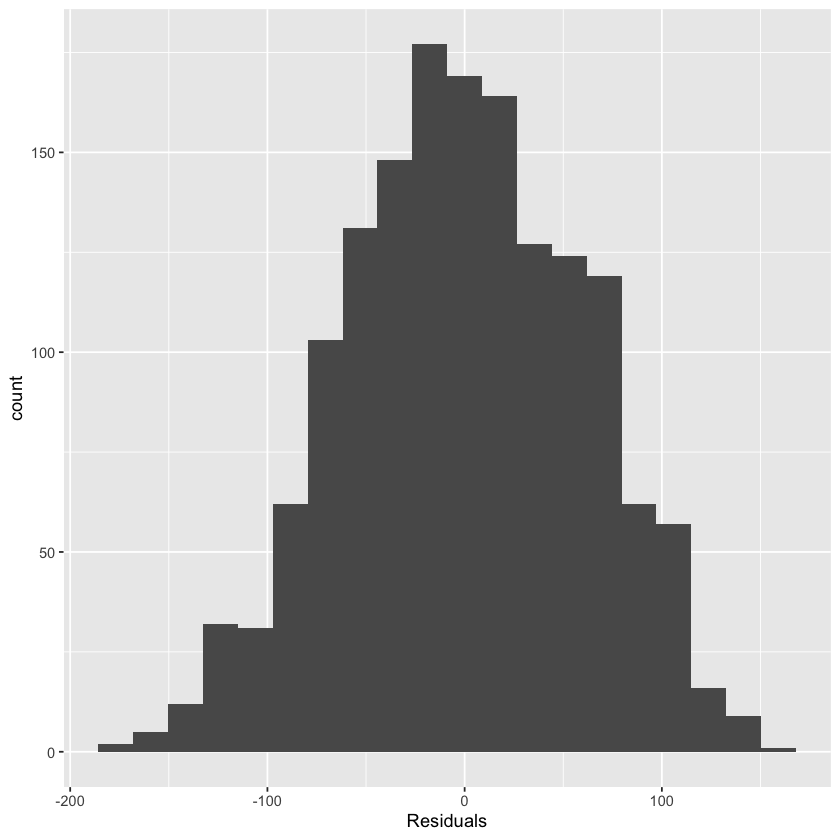

In [19]:
lm2 <- lm(gss_cl,formula = coninc_trans ~  educ )

ggplot(data = lm2, aes(sample = .resid))  +
    stat_qq() + stat_qq_line(col='blue', lty="longdash", size=1) +
    xlab("Theoretical") + ylab("Sample")

ggplot(data = lm2, aes(x = .resid)) +
  geom_histogram(bins=20) +
  xlab("Residuals")

In [20]:
summary(lm2)


Call:
lm(formula = coninc_trans ~ educ, data = gss_cl)

Residuals:
     Min       1Q   Median       3Q      Max 
-183.522  -43.928    1.308   44.230  152.478 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  68.4260     7.3625   9.294   <2e-16 ***
educ          8.8835     0.5335  16.651   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 61.01 on 1549 degrees of freedom
Multiple R-squared:  0.1518,	Adjusted R-squared:  0.1513 
F-statistic: 277.3 on 1 and 1549 DF,  p-value: < 2.2e-16


Thus, the model is as follows:

$\hat{y} = 68.426 + 8.883 \times \mbox{educ}$

where, the estimation for **coninc** using this model is obtained by:

$\hat{y} = \frac{y^\lambda - 1}{\lambda} \longrightarrow y = \sqrt[\lambda]{\lambda \hat{y} + 1} \longrightarrow y = \sqrt[\lambda]{68.426\lambda  + 8.883\lambda \times \mbox{educ} + 1} $

## R Squared

R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines how well the data fit the regression model (the goodness of fit).

- strength of the fit of a linear model is most commonly evaluated using $\mbox{R}^2$
- calculated as the square of the correlation coefficient
- tells us what percent of variability in the response variable is explained by the model
- the remainder of the variability is explained by variables not included in the model
- always between 0 and 1

## Inference for Linear Regression

**Question: Is the explanatory variable a significant predictor of the response variable?**

### Testing for the slope- hypotheses

- $\mbox{H}_0$: $\beta_1=0$

The explanatory variable is not a significant predictor of the response variable (meaning no relationship or the slope of the relationship is 0)

- $\mbox{H}_A$: $\beta_1\neq0$

The explanatory variable is a significant predictor of the response variable (meaning the slope of the relationship is different than 0)

From the regression output, you can find the p-value.

## Confidence Interval for the Slope

point estimate $\pm$ margin of error

$b_1 \pm t^\star_{df}SE_{b_1}, \quad df=n-2$

#### Example: 
Suppose that we have 30 observations and the obtained value for $b_1$ is 1.3 with the $SE=0.1$, thus the 95% confidence interval can be obtained as follows:

In [21]:
b1 = 1.3
SE = 0.1
df = 30 - 2
p = (1 - 0.95)/2 
t_star = qt(p, df= 28, lower.tail=FALSE)

delta = t_star * SE
delta

[1] 0.2048407

Therefore, the 95% confidence interval can be obtained as follows:  $1.3 \pm 0.204$ 

## Regression with Multiple Predictors

Define the multiple linear regression model as

$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_kx_k$

where there are $k$ predictors (explanatory variables)

In [22]:
lm3 <- lm(data=gss_cl, formula = coninc ~ educ + age + marital)
summary(lm3)


Call:
lm(formula = coninc ~ educ + age + marital, data = gss_cl)

Residuals:
   Min     1Q Median     3Q    Max 
-60053 -15592  -3489  12303  86721 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            6634.96    3483.79   1.905    0.057 .  
educ                   3398.44     197.81  17.180  < 2e-16 ***
age                     -63.77      40.51  -1.574    0.116    
maritalWidowed       -20078.24    2355.49  -8.524  < 2e-16 ***
maritalDivorced      -19099.53    1614.13 -11.833  < 2e-16 ***
maritalSeparated     -25735.29    3111.63  -8.271 2.84e-16 ***
maritalNever Married -22287.63    1518.77 -14.675  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22550 on 1544 degrees of freedom
Multiple R-squared:  0.3008,	Adjusted R-squared:  0.2981 
F-statistic: 110.7 on 6 and 1544 DF,  p-value: < 2.2e-16


So the model is as follows:

$\quad\qquad \hat{y} = 6634.96 + 3398.44 \times \mbox{educ}  -63.77\times\mbox{age} -20078.24\times\mbox{marital:Widowed} -$ $\qquad\qquad19099.53\times\mbox{marital:Divorced} -  25735.29\times\mbox{marital:Separated} - 22287.63\times\mbox{marital:Never Married}$

This implies that, one can comput the income as follows:

Widowed: $\quad\qquad \hat{y} = 6634.96 + 3398.44 \times \mbox{educ}  -63.77\times\mbox{age} - 20078.24 $

Divorced: $\quad\qquad \hat{y} =6634.96 +  3398.44 \times \mbox{educ}  -63.77\times\mbox{age} - 19099.53 $

Seprated: $\quad\qquad \hat{y} =6634.96 +  3398.44 \times \mbox{educ}  -63.77\times\mbox{age} - 25735.29 $

Never Married: $~\quad \hat{y} =6634.96 +  3398.44 \times \mbox{educ}  -63.77\times\mbox{age} - 22287.63 $

## Inference for the Linear Model with Multiple Predictors

The significance of the model as a whole is assessed using an F-test.

- $H_0$: $\beta_1=\beta_2=\cdots=\beta_k=0$
- $H_A$: $\mbox{At least one  } \beta_i \neq0$
- $df=n-k-1 \mbox{ degrees of freedom}$

#### In the above model:

F-statistic: 110.7 on 6 and 1544 DF, p-value: < 2.2e-16

Since p-value<0.05, the model as a whole is **significant**.

- The F test yielding a significant result doesn't mean the model fits the data well, it just means at least **one of the $\beta$'s** is **non-zero**

- The F test **not** yielding a **significant** result **doesn't mean** individual variables included in the model are not good predictors of y, it just means that the combination of these variables doesn't yield a good model.

## Hypothesis Testing for Slopes

The p-value associated with each predictor are conditional on other variables being included in the model, so they can be used to assess whether a given predictor is significant, given that all others are in the model.

- $H_0: \beta_1=0$, given all other variables are included in the model
- $H_A: \beta_1 \neq 0$, given all other variables are included in the model
- These p-values are calculated based on a t distribution with $n-k-1$ degrees of freedom
- The same degrees of freedom can be used to construct a confidence interval for the slope parameter of each predictor: $\quad b_i \pm t^\star_{n-k-1}SE_{b_i}$

#### For example for *age* we have:

p-value = 0.116 > 0.05

Therefore **age** is **not** a significant predictor.

#### Confidence interval
Now, Suppose that we want to compute the 95% confidence interval for the **educ**:

In [23]:
b1 = 3398.44
SE = 197.81
n = 1551
k = 6
df = n - k - 1 
p = (1 - 0.95)/2 
t_star = qt(p, df= 28, lower.tail=FALSE)

delta = t_star * SE
delta

[1] 405.1954

This means that 95% confidence interval for coefficient of **educ** is as follows:

$3398.44 \pm 405.19 : (2993.25,~ 3803.63)$

## Model Selection

The best model is not always the most complicated. Sometimes including variables that
are not evidently important can actually reduce the accuracy of predictions.


**Stepwise** model selection (backward or forward) can be done based on p-values (drop variables that are not significant) or based on adjusted $R^2$ (choose the model with higher adjusted $R^2$)

- **Backward elimination** begins with the **largest model** and eliminates variables one- by-one until we are satisfied that all remaining variables are important to the model

- **Forward selection** starts with **no variables** included in the model, then it adds in variables **according to their importance** until no other important variables are found

There is **no guarantee** that **backward elimination** and **forward selection** will arrive at the same  final model

### Backward-Selection

* p-value method:
    + Start with the full model
    + Drop the variable with the highest p-value and refit the model
    + Repeat until all remaining variables are significant
    
* Adjusted $R^2$ method:
    + Start with the full model
    + Refit all possible models omitting one variable at a time, and choose the model with the highest adjusted $R^2$.
    + Repeat until maximum possible adjusted $R^2$ is reached.

### Forward-Selection

* p-value method:
    + Try all possible simple linear regression models predicting $y$ using one explanatory variable at a time. Choose the model where the explanatory variable of choice has the lowest p-value.
    + Try all possible models adding one more explanatory variable at a time, and choose the model where the added explanatory variable has the lowest p-value.
    + Repeat until all added variables are significant.
    
* Adjusted $R^2$ method:
    + Try all possible simple linear regression models predicting $y$ using one explanatory variable at a time. Choose the model with the highest adjusted $R^2$.
    + Try all possible models adding one more explanatory variable at a time, and choose the model with the highest adjusted $R^2$.
    + Repeat until maximum possible adjusted $R^2$ is reached.
    

### Example 1: Backward Selection using adjusted $R^2$

| Step | variables included | removed | adjusted $R^2$ |
|----- | :--- | :--- | ---: |
| FULL| coninc ~ age + sex + educ + race + degree + wrkslf + marital + wrkstat |  | **0.3564**|
| Step 1| coninc ~ age + sex + educ + race + degree + wrkslf + marital | wrkstat | 0.3203|
|  | coninc ~ age + sex + educ + race + degree + wrkslf + wrkstat | marital | 0.2357|
| |  coninc ~ age + sex + educ + race + degree  + marital +  wrkstat | wrkslf | **0.3569** |
| | coninc ~ age + sex + educ + race  + wrkslf + marital +  wrkstat | degree | 0.3454 |
| | coninc ~ age + sex + educ + degree  + wrkslf + marital +  wrkstat | race | 0.3547 |
| | coninc ~ age + sex +  race + degree  + wrkslf + marital +  wrkstat | educ | 0.3516 |
| | coninc ~ age + educ +  race + degree  + wrkslf + marital +  wrkstat | sex | 0.3562 |
| | coninc ~ sex + educ +  race + degree  + wrkslf + marital +  wrkstat | age | 0.3564 | 
| Step 2 | coninc ~ age + sex + educ + race + degree  + marital | wrkstat | 0.3206 |
| | coninc ~ age + sex + educ + race + degree  + wrkstat | marital | 0.2362| 
| | coninc ~ age + sex + educ + race + marital + wrkstat | degree | 0.3458 |
| | coninc ~ age + sex + educ  + degree  + marital +  wrkstat | race | 0.3551 |
| | coninc ~ age + sex +  race + degree + marital + wrkstat | edcu | 0.352 |
| | coninc ~ age  + educ + race + degree  + marital +  wrkstat | sex | 0.3566 | 
| | coninc ~ sex + educ + race + degree  + marital +  wrkstat | age | 0.3568 |



Therefore, the final model is obtained by the following formula:

**coninc ~ age + sex + educ + race + degree + marital + wrkstat**

with

adjusted $R^2$: **0.3569**


### Example 2: Backward selection using p-value

Now, let's use backward selection using p-value to obtain the ideal model:

| Predictor | p-value, Step1 | p-value, Step2 | p-value, Step3| p-value, Step4 |
| :--------| :------: | :------:| :-------:| :------:|
|age                       | 0.283977    |**0.281124**| ------     | -----   |  
|sex:Female                | 0.203099    | 0.202781   |**0.200315**| -----   |
|educ                      |  0.000424   | 0.000419   | 0.000529   | 0.000655|  
|race:Black                | 0.014680    | 0.014643   | 0.015324   | 0.011715|     
|race:Other                | 0.450396    | 0.450368   | 0.390737   | 0.400088|     
|degree:High School        |  0.053063   | 0.053004   | 0.051902   | 0.056795|      
|degree:Junior College     |  0.019092   | 0.019056   | 0.017891   | 0.019735|     
|degree:Bachelor           | 1.30e-05    | 1.29e-05   | 1.04e-05   | 1.06e-05|     
|degree:Graduate           | 5.69e-05    | 5.66e-05   | 3.87e-05   | 3.69e-05|   
|wrkslf:Someone Else       |**0.976669** | --------   | --------   | ------- |     
|marital:Widowed           | 1.33e-13    | 1.31e-13   | 1.76e-13   | 4.89e-14| 
|marital:Divorced          | < 2e-16     | < 2e-16    | < 2e-16    | < 2e-16 |   
|marital:Separated         | 1.71e-13    | 1.67e-13   | 1.37e-13   | 1.09e-13|   
|marital:Never Married     | < 2e-16     | < 2e-16    | < 2e-16    | < 2e-16 |    
|wrkstat:Working Parttime  | 5.00e-06    | 4.40e-06   | 4.92e-06   | 2.42e-06|    
|wrkstat:Temp Not Working  | 0.078508    | 0.078388   | 0.080356   | 0.063183|      
|wrkstat:Unempl, Laid Off  | 4.90e-06    | 4.81e-06   | 5.46e-06   | 4.57e-06|   
|wrkstat:Retired           | 7.53e-11    | 6.49e-11   | 1.05e-12   | 9.20e-13|    
|wrkstat:School            | 0.001367    | 0.001362   | 0.000927   | 0.000718|    
|wrkstat:Keeping House     | 3.09e-10    | 2.88e-10   | 3.68e-10   | 1.53e-11|    
|wrkstat:Other             | 0.000204    | 0.000203   | 0.000304   | 0.000329|   

Therefore, the final model is obtained by the following formula:

**coninc ~ educ + race + degree + marital + wrkstat**

with

adjusted $R^2$: **0.3565**

### Example 3: Forward selection using adjusted $R^2$ 

| Step | variables included | adjusted $R^2$ |
|----- | :--- |  ---: |
| Step 1| coninc ~ age    | -4.55e-05 |
|       | coninc ~ sex    | 0.003249  |
|       | coninc ~ educ   | 0.1469    |
|       | coninc ~ race   | 0.01611   |
|       | coninc ~ degree |**0.172**  |
|       | coninc ~ wrkslf | -0.0006302|
|       | coninc ~ marital| 0.1635    |
|       | coninc ~ wrkstat| 0.07773   |
| Step 2| coninc ~ degree + age    | 0.172    |
|       | coninc ~ degree + sex    | 0.1763   |
|       | coninc ~ degree + educ   | 0.173    |
|       | coninc ~ degree + race   | 0.1809   |
|       | coninc ~ degree + wrkslf | 0.1717   |
|       | coninc ~ degree + marital|**0.3108**|
|       | coninc ~ degree + wrkstat| 0.2215   |
| Step 3| coninc ~ degree + marital + age    | 0.3124   |
|       | coninc ~ degree + marital + sex    | 0.3136   |
|       | coninc ~ degree + marital + educ   | 0.3144   |
|       | coninc ~ degree + marital + race   | 0.3127   |
|       | coninc ~ degree + marital + wrkslf | 0.3105   |
|       | coninc ~ degree + marital + marital| 0.3108   |
|       | coninc ~ degree + marital + wrkstat|**0.3502**|
| Step 4| coninc ~ degree + marital + wrkstat + age    | 0.3501   |
|       | coninc ~ degree + marital + wrkstat + sex    | 0.3505   |
|       | coninc ~ degree + marital + wrkstat + educ   |**0.3546**|
|       | coninc ~ degree + marital + wrkstat + race   | 0.352    |
|       | coninc ~ degree + marital + wrkstat + wrkslf | 0.3498   |
| Step 5| coninc ~ degree + marital + wrkstat + educ + age   | 0.3547   |
|       | coninc ~ degree + marital + wrkstat + educ + sex   | 0.3551   |
|       | coninc ~ degree + marital + wrkstat + educ + race  |**0.3565**|
|       | coninc ~ degree + marital + wrkstat + educ + wrkslf| 0.3542   |
| Step 6| coninc ~ degree + marital + wrkstat + educ + race + age    | 0.3566 |
|       | coninc ~ degree + marital + wrkstat + educ + race + sex    |**0.3568**|
|       | coninc ~ degree + marital + wrkstat + educ + race + wrkslf | 0.3561 | 
| Step 7| coninc ~ degree + marital + wrkstat + educ + race + sex + age    |**0.3569**|
|       | coninc ~ degree + marital + wrkstat + educ + race + sex + wrkslf | 0.3564 |
| Step 8| coninc ~ degree + marital + wrkstat + educ + race + sex + age + wrkslf | 0.3564 |



Therefore, the best model is obtained in Step 7 with the following predictors:

**coninc ~ degree + marital + wrkstat + educ + race + sex + age**

with 

adjusted $R^2$: **0.3569**

## Diagnostics for MLR

Conditions required for the multiple linear regression model:

- linear relationships between $x$ and $y$
- nearly normal residuals
- constant variability of residuals
- independence of residuals

### Linear relationships between (numerical) x and y

- each (numerical) explanatory variable linearly related to the response variable
- Check using residuals plots ($e$ vs. $x$)
    + looking for a random scatter around 0
    + instead of scatterplot of $y$ vs. $x$: allows for considering the other variables that are also in the model, and not just the bivariate relationship between a given $x$ and $y$

Let's consider a linear regression model to predict **coninc_trans** using the predictors: **educ + race + degree + marital + wrkstat** 

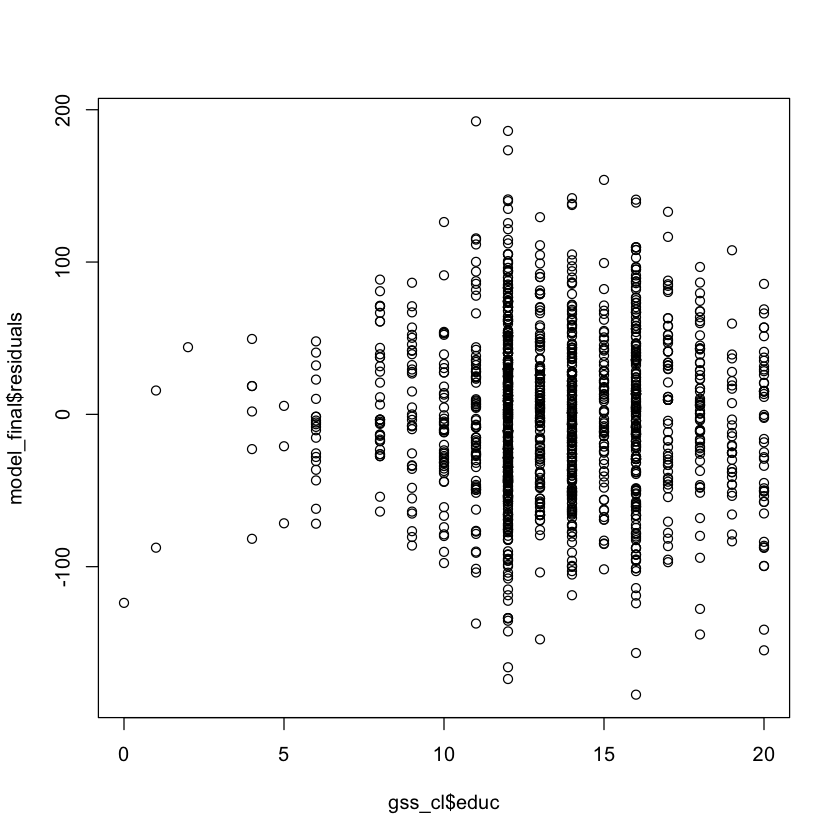

In [24]:
# Note that the only numerical variable here is educ

model_final <- lm(data=gss_cl, formula = coninc_trans ~ educ + race + degree + marital + wrkstat)
plot(model_final$residuals ~ gss_cl$educ)



### Nearly normal residuals with mean 0

- some residuals will be positive and some negative
- on a residuals plot we look for random scatter of residuals around 0
- this translates to a nearly normal distribution of residuals centered at 0
- check using histogram or normal probability plot

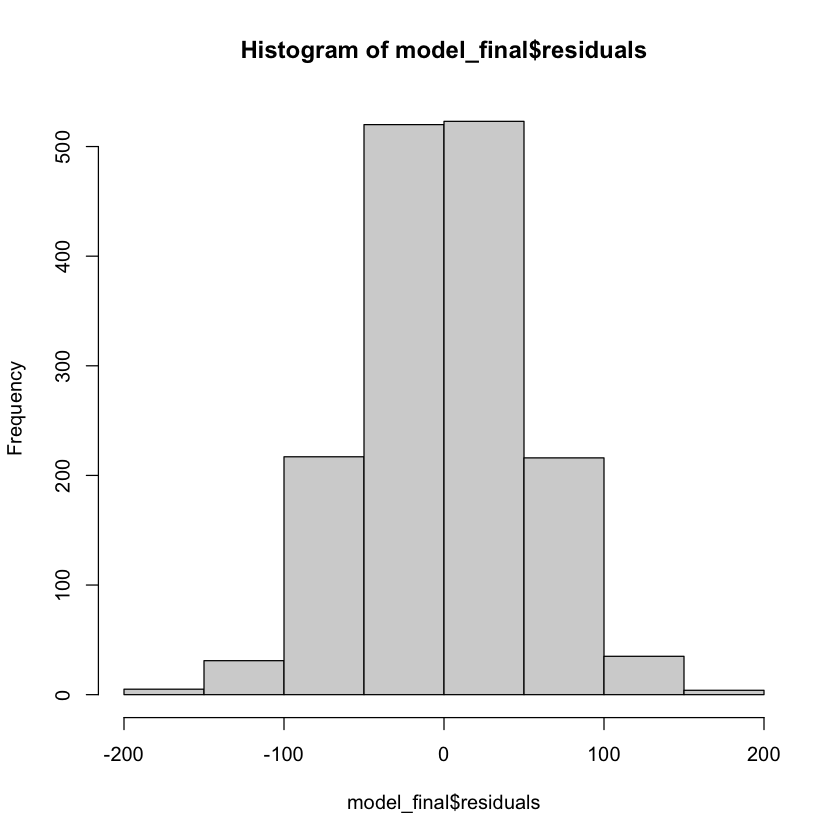

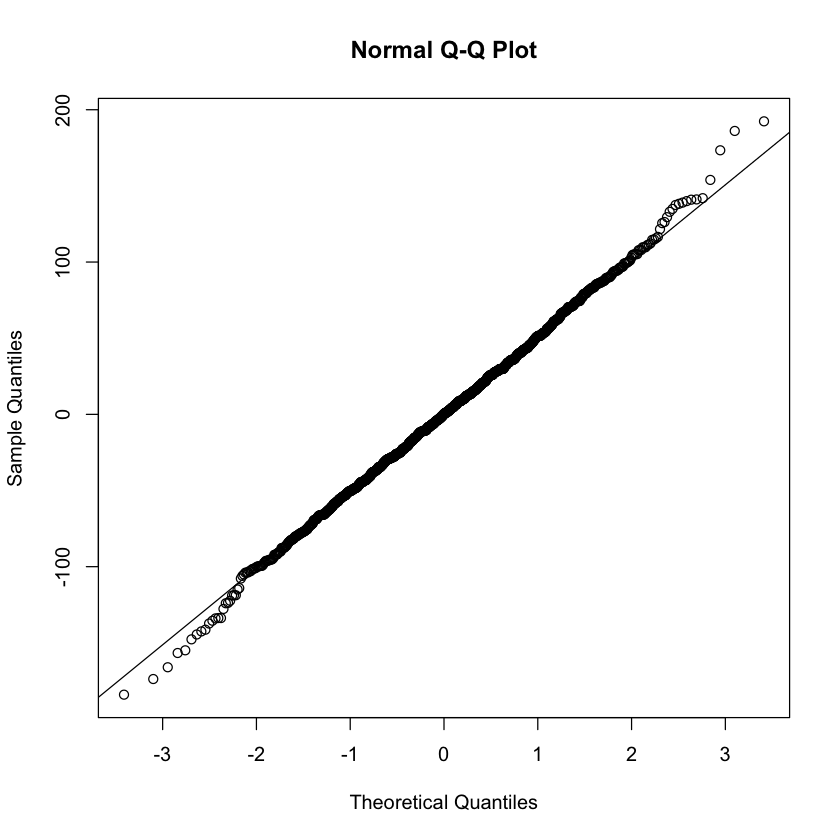

In [25]:
hist(model_final$residuals)
qqnorm(model_final$residuals)
qqline(model_final$residuals)

### Constant variability of residuals

- residuals should be equally variable for low and high values of the predicted response variable
- check using residuals plots of residuals vs. predicted ($e$ vs. $\hat{y}$)
- residuals randomly scattered in a band with a constant width around 0 (no fan shape)

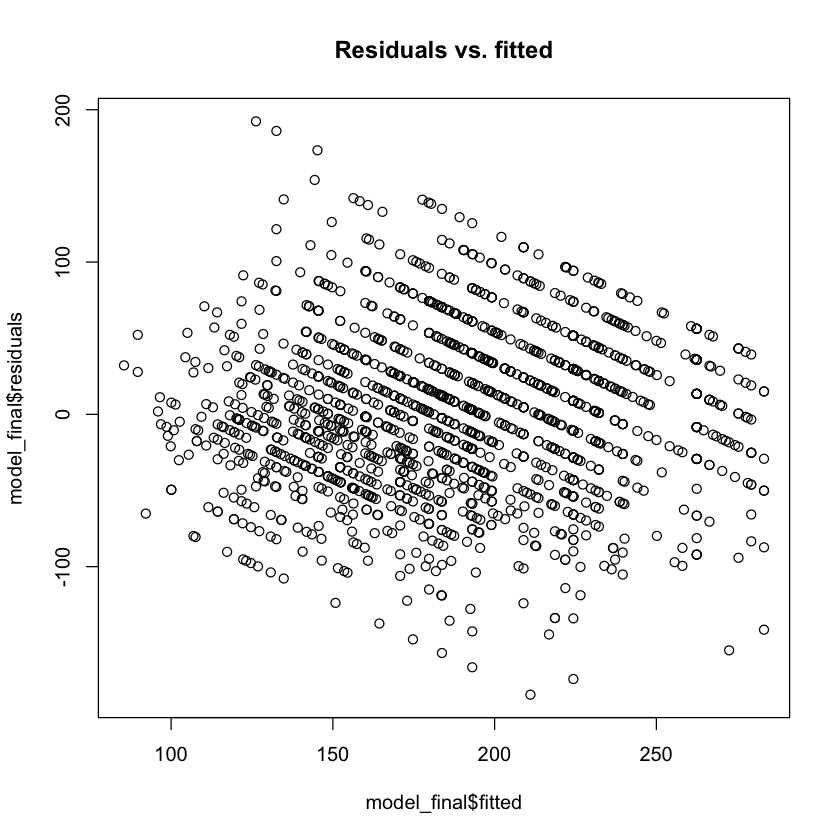

In [26]:
plot(model_final$residuals ~ model_final$fitted)
title('Residuals vs. fitted')

### Independent residuals

- independent residuals --> independent observations
- if time series structure is suspected check using residuals vs. order of data collection
- if not, think about how the data are sampled

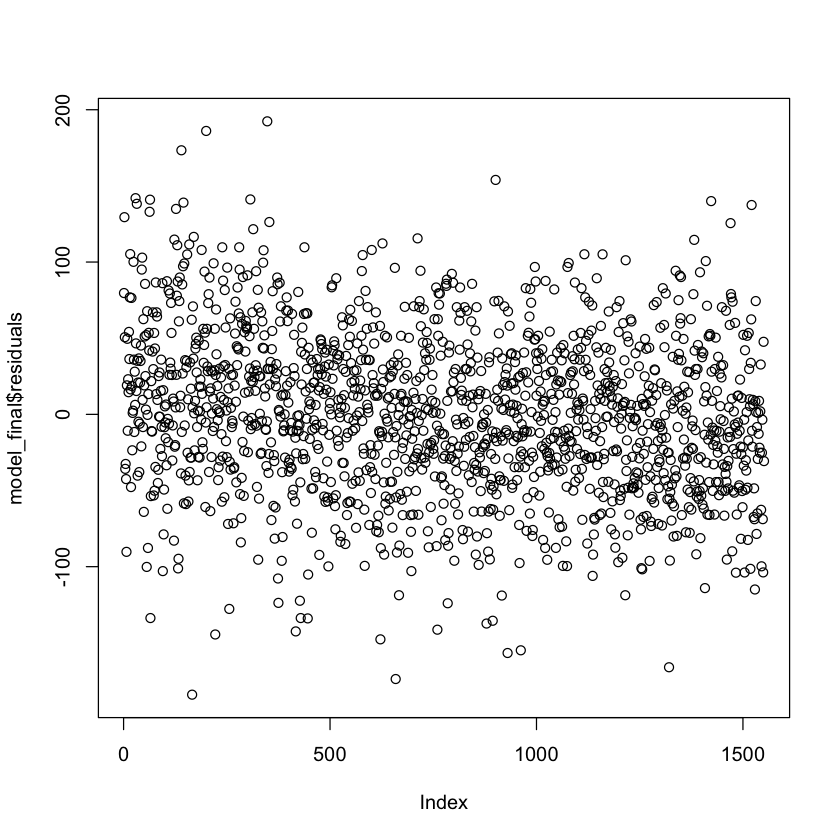

In [27]:
plot(model_final$residuals)